Experiment (plocalf1fps1w10c2m1g)


<IPython.core.display.Javascript object>


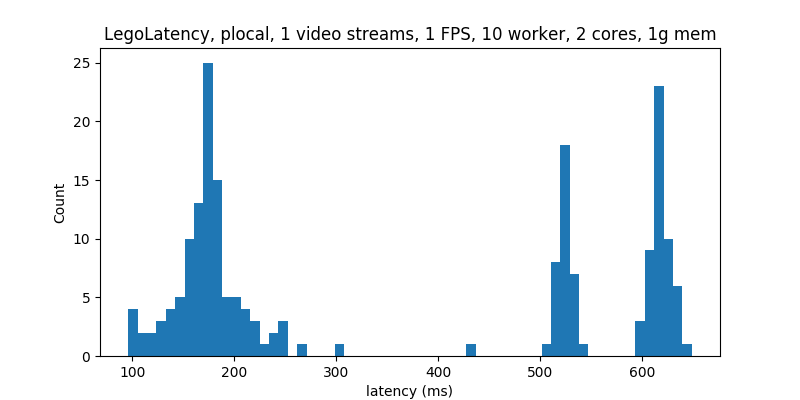

Experiment (plocalf1fps1w10c4m1g)


<IPython.core.display.Javascript object>


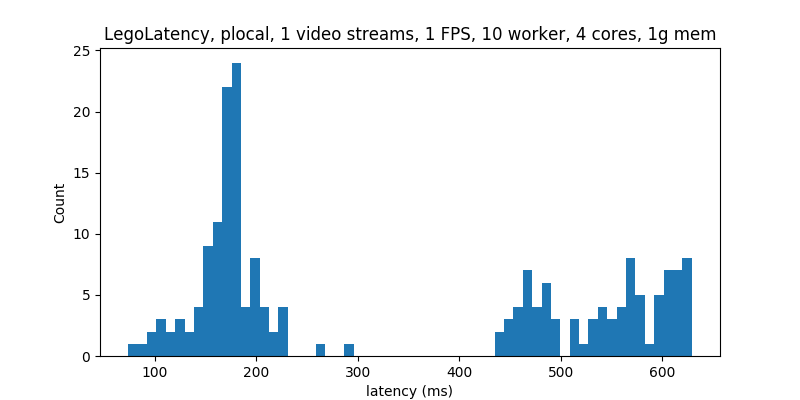

Experiment (plocalf1fps2w10c2m1g)
Experiment (plocalf1fps2w10c4m1g)


In [2]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import itertools
import numpy as np
%matplotlib notebook

from rmexp import dbutils, config
from rmexp.schema import models

prefix = ['plocal'] #, 'pwifi', 'ppoorwifi']
feeds = [1]
fpss = [1, 2]
workers = [10]
cores = [2, 4]
memorys = ["1g"]

sess = dbutils.get_session()

choices = [prefix, feeds, fpss, workers, cores, memorys]
for combo in itertools.product(*choices):
    exp_name = '{}f{}fps{}w{}c{}m{}'.format(*combo)
    print("Experiment ({})".format(exp_name))
    latencys = [item.val for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name==exp_name).all()]
    if len(latencys) == 0:
        continue
    plt.figure(figsize=(8, 4))
    plt.hist(latencys, bins=60);
    plt.ylabel('Count');
    plt.xlabel('latency (ms)');
    plt.title('LegoLatency, {}, {} video streams, {} FPS, {} worker, {} cores, {} mem'.format(*combo))

In [ ]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

from rmexp import dbutils, config
from rmexp.schema import models

sess = dbutils.get_session()

plt.figure()
latencys = [item.val for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name=="host").all()]
plt.hist(latencys, density=True, bins=30);
plt.ylabel('Probability');
plt.xlabel('latency (ms)');
plt.title('LegoLatency 1 video streams at 10 FPS, 8 worker, host')

plt.figure()
latencys = [item.val for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name=="host2separatesession").all()]
plt.hist(latencys, density=True, bins=30);
plt.ylabel('Probability');
plt.xlabel('latency (ms)');
plt.title('LegoLatency 1 video streams at 10 FPS, 8 worker, host')

In [ ]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

from rmexp import dbutils, config
from rmexp.schema import models

sess = dbutils.get_session()
print('cpu vs cpu-set')
plt.figure()
latencys = [item.val for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name=="batchc4m1g").all()]
plt.hist(latencys, density=True, bins=30);
plt.ylabel('Probability')
plt.xlabel('latency (ms)')
plt.title('LegoLatency process from file directly, 4 core (specified by cpu), 1G memory')

plt.figure()
latencys = [item.val for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name=="batchcpusetc4m1g").all()]
plt.hist(latencys, density=True, bins=30);
plt.ylabel('Probability')
plt.xlabel('latency (ms)')
plt.title('LegoLatency process from file directly, 4 core (specified by cpuset), 1G memory')

plt.figure()
latencys = [item.val for item in sess.query(models.LegoLatency).filter(models.LegoLatency.name=="test").all()]
plt.hist(latencys, density=True, bins=30);
plt.ylabel('Probability')
plt.xlabel('latency (ms)')
plt.title('LegoLatency process test exp')

In [ ]:
dbutils.session.rollback()